Loan Prediction Dataset from Analytics Vidhya.

# Loading the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# EDA and Missing values

#### Quick Data Overview

In [3]:
train_data.shape

(614, 13)

In [4]:
train_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
train_data.describe()   #Get the summary of numerical values.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

For the non-numerical values (e.g. Property_Area, Credit_History etc.), we can look at frequency distribution to understand whether they make sense or not. The frequency table can be printed by following command:

In [7]:
train_data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [8]:
train_data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [9]:
train_data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [10]:
train_data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [11]:
train_data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [12]:
train_data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [13]:
train_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [14]:
train_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

#### Distribution Analysis

Now that we are familiar with basic data characteristics, let us study distribution of various variables. Let us start with numeric variables – namely ApplicantIncome and LoanAmount

<AxesSubplot:>

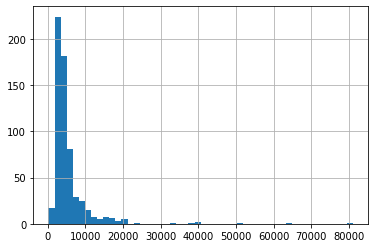

In [15]:
train_data['ApplicantIncome'].hist(bins=50)

Here we observe that there are few extreme values. This is also the reason why 50 bins are required to depict the distribution clearly.

Next, we look at box plots to understand the distributions. Box plot for fare can be plotted by:

<AxesSubplot:>

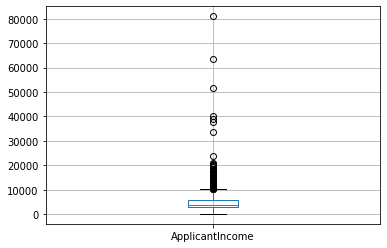

In [16]:
train_data.boxplot(column='ApplicantIncome')

This confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. 

Part of this can be driven by the fact that we are looking at people with different education levels. 
Let us segregate them by Education:

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

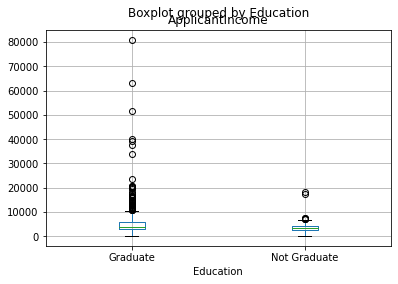

In [17]:
train_data.boxplot(column='ApplicantIncome', by='Education')

We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

Now, Let’s look at the histogram and boxplot of LoanAmount using the following command:

<AxesSubplot:>

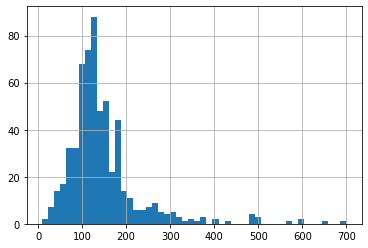

In [18]:
train_data['LoanAmount'].hist(bins=50)

<AxesSubplot:>

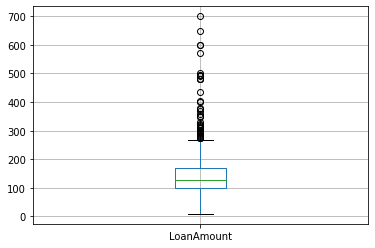

In [19]:
train_data.boxplot(column='LoanAmount')

<AxesSubplot:title={'center':'LoanAmount'}, xlabel='Education'>

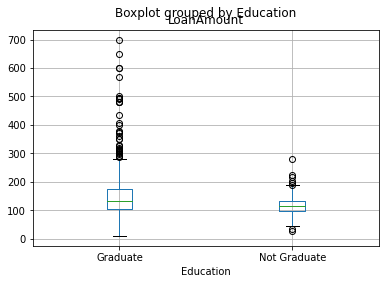

In [20]:
train_data.boxplot(column='LoanAmount', by='Education')

Again, there are some extreme values. Clearly, both ApplicantIncome and LoanAmount require some amount of data munging. LoanAmount has missing and well as extreme values values, while ApplicantIncome has a few extreme values, which demand deeper understanding.

#### Categorical Variable Analysis

Now that we understand distributions for ApplicantIncome and LoanIncome, let us understand categorical variables in more details. We will use Excel style pivot table and cross-tabulation.

In [22]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [23]:
temp1 = train_data['Credit_History'].value_counts(ascending=True)
temp2 = train_data.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (temp1)

print ('\nProbility of getting loan for each Credit History class:')
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


This can be plotted as a bar chart using the “matplotlib” library with following code:

Text(0.5, 1.0, 'Probability of getting loan by credit history')

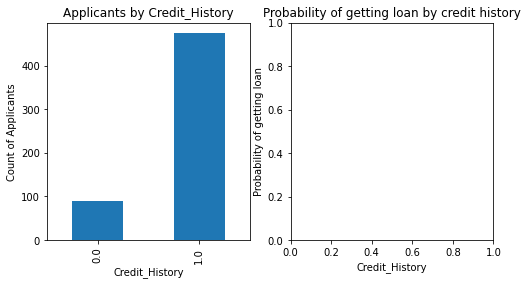

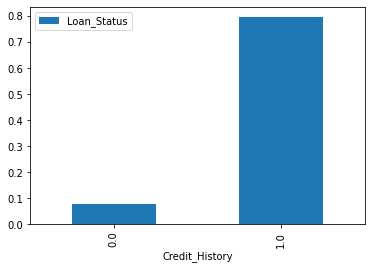

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

This shows that the chances of getting a loan are eight-fold if the applicant has a valid credit history. You can plot similar graphs by Married, Self-Employed, Property_Area, etc.

Alternately, these two plots can also be visualized by combining them in a stacked chart:

<AxesSubplot:xlabel='Credit_History'>

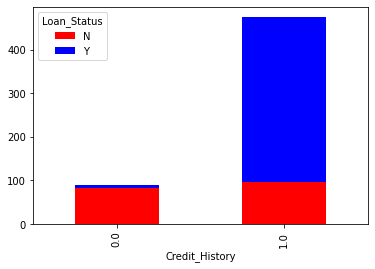

In [26]:
temp3 = pd.crosstab(train_data['Credit_History'], train_data['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

You can also add gender into the mix (similar to the pivot table in Excel):

If you have not realized already, we have just created two basic classification algorithms here, one based on credit history, while other on 2 categorical variables (including gender). You can quickly code this to create your first submission on AV Datahacks.

We just saw how we can do exploratory analysis in Python using Pandas. I hope your love for pandas (the animal) would have increased by now – given the amount of help, the library can provide you in analyzing datasets.

Next let’s explore ApplicantIncome and LoanStatus variables further, perform data munging and create a dataset for applying various modeling techniques. I would strongly urge that you take another dataset and problem and go through an independent example before reading further.

# Data Munging

### Missing Values

In [27]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Note: Remember that missing values may not always be NaNs. For instance, if the Loan_Amount_Term is 0, does it makes sense or would you consider that missing? I suppose your answer is missing and you’re right. So we should check for values which are unpractical.

In [32]:
train_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [34]:
train_data['Loan_Amount_Term'].isna().sum()

14